# Lab 3.4 Confidence Intervals

Example of calculating confidence intervals for a least squares linear regression model.

---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

We are working with the snow pillow data again, measurements of snow water equivelent at two different locations. Load the data file.

In [2]:
# snow pillow (snow water equivalent) example data
data = pd.read_csv('../data/pillows_example.csv')

# Assigning my values to variables x and y for ease of use below
x = data['SLI_max'].values
y = data['BLC_max'].values

**First, plot the data to get an idea of what it looks like.**

- Does it look like we should try and fit a linear model to this? 
- Does the variance in y values change as we move along the x axis (heteroscedasticity)?

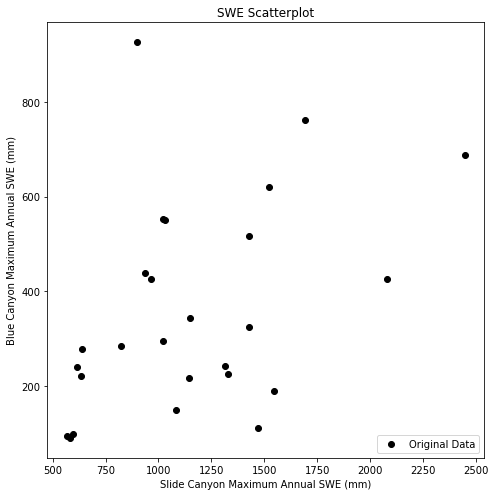

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)

# Scatterplot of original data
ax.scatter(x, y, c='k', label='Original Data')

# Add legend
plt.legend(loc='lower right');

# Add axes labels and title
ax.set_xlabel('Slide Canyon Maximum Annual SWE (mm)')
ax.set_ylabel('Blue Canyon Maximum Annual SWE (mm)')
ax.set_title('SWE Scatterplot');

Honestly, not really. But lets go ahead for the sake of the example.

## Least Squares Linear Regression

**Compute our least squares linear regression parameters**: B1 (the slope), and B0 (the y intercept)

$B_1 = \displaystyle \frac{n(\sum_{i=1}^{n}x_iy_i)-(\sum_{i=1}^{n}x_i)(\sum_{i=1}^{n}y_i)}{n(\sum_{i=1}^{n}x_i^2)-(\sum_{i=1}^{n}x_i)^2}$

$B_0 = \displaystyle \frac{(\sum_{i=1}^{n}y_i)-B_1(\sum_{i=1}^{n}x_i)}{n} = \bar{y} - B_1\bar{x}$

In [4]:
n = len(x)

B1 = ( n*np.sum(x*y) - np.sum(x)*np.sum(y) ) / ( n*np.sum(x**2) - np.sum(x)**2 ) # B1 parameter, slope
B0 = np.mean(y) - B1*np.mean(x) # B0 parameter, y-intercept

print('B0 : {}'.format(np.round(B0,4)))
print('B1 : {}'.format(np.round(B1,4)))

B0 : 127.9143
B1 : 0.1997


We can now compute our predicted y values ($\hat{y}$)

 $\hat{y}_i = B_0 + B_1x_i$
 
(here we'll use our original x values as the input)

In [5]:
y_predicted = B0 + B1*x

Compute our residuals $(y_i - \hat{y}_i)$

In [6]:
residuals = (y - y_predicted)

And then go ahead and compute, the Sum of Square Errors ($SSE$), the Total Sum of Squares ($SST$), and we'll also need the $SST_x$ (total sum of squares in the x dimension).

$SSE = \displaystyle\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ 

$SST = \displaystyle\sum_{i=1}^{n} (y_i - \bar{y}_i)^2$

$SST_x = \displaystyle\sum_{i=1}^{n} (x_i - \bar{x}_i)^2$

Compute our coefficient of correlation, $r$

$r^2 = 1 - \displaystyle \frac{SSE}{SST}$

and finally our standard error, $s$


$s = \sqrt{\displaystyle\frac{SSE}{(n-2)}}$

In [7]:
# sum of squared errors
sse = np.sum(residuals**2)

# total sum of squares (y)
sst = np.sum( (y - np.mean(y))**2 )

# total sum of squares (x)
sst_x = np.sum( (x - np.mean(x))**2 )

# correlation coefficient
r_squared = 1 - sse/sst
r = np.sqrt( r_squared )

# standard error of regression
s = np.sqrt(sse/(n-2))

In [8]:
# Printing these out so we can see them
print('SSE : {}'.format(np.round(sse,2)))
print('SST : {}'.format(np.round(sst,2)))
print('SSTx : {}'.format(np.round(sst_x,2)))
print('R^2 : {}'.format(np.round(r_squared,3)))
print('R : {}'.format(np.round(r,3)))
print('s : {}'.format(np.round(s,3)))

SSE : 999651.24
SST : 1219919.85
SSTx : 5524345.88
R^2 : 0.181
R : 0.425
s : 204.089


**Plot the data with our linear regression model**

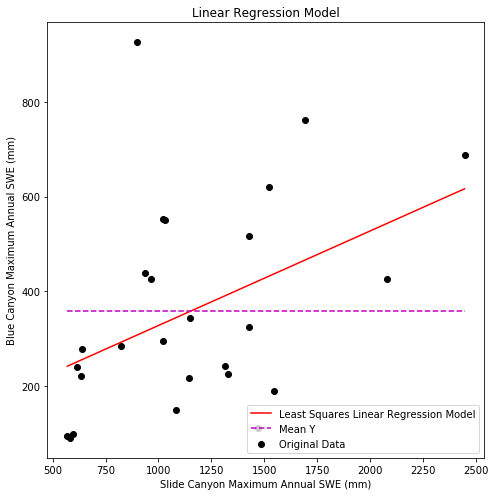

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)

# Scatterplot of original data
ax.scatter(x, y, c='k', label='Original Data')

# Plot the regression line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [B0 + B1*x.min(), B0 + B1*x.max()] , '-r', label='Least Squares Linear Regression Model')

# Plot the mean line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [y.mean(), y.mean()] , '--m', label='Mean Y')

# Add legend
plt.legend(loc='lower right');

# Add axes labels and title
ax.set_xlabel('Slide Canyon Maximum Annual SWE (mm)')
ax.set_ylabel('Blue Canyon Maximum Annual SWE (mm)')
ax.set_title('Linear Regression Model');

**Plot the residuals** to make sure they don't have any sort of trend or pattern and are roughly normally distributed

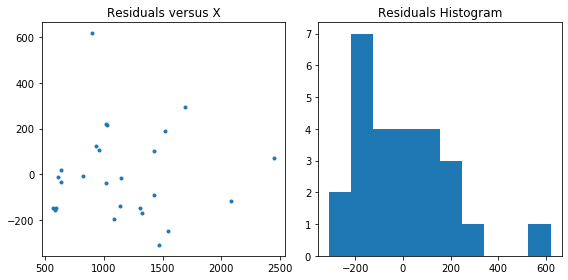

In [10]:
fig, [ax2, ax3] = plt.subplots(nrows=1, ncols=2, figsize=(8,4), tight_layout=True)

# Plot the residuals
ax2.plot(x,residuals,'.')
ax2.set_title('Residuals versus X');

# Plot a histogram of the residuals
ax3.hist(residuals, bins=10)
ax3.set_title('Residuals Histogram');

## Confidence Interval for the Slope (B1)

**Compute the confidence intervals around our B1 parameter, the slope**

We first specify our $\alpha$ for our chosen level of confidence (95%), and our degrees of freedom $dof = n - 2$

In [11]:
# our alpha for 95% confidence
alpha = 0.05

# length of the dataset
n = len(x)
# degrees of freedom
dof = n - 2

Now, compute the Standard Error of the Gradient (Slope):

$s_{B_1} = \displaystyle \frac{s}{\sqrt{SST_x}} $

In [12]:
# standard error of the gradient (slope)
sB1 = s/np.sqrt(sst_x)

This follows a t-distribution, find the t-value that corresponds with our $\alpha$ and $dof$

In [13]:
# t-value for alpha/2 with n-2 degrees of freedom
t = stats.t.ppf(1-alpha/2, dof)

Compute the upper and lower limits for the B1 parameter

In [14]:
# compute the upper and lower limits on our B1 (slope) parameter
B1_upper = B1 + t * sB1
B1_lower = B1 - t * sB1

# compute the corresponding upper and lower B0 values (y intercepts)
B0_upper = y.mean() - B1_upper*x.mean()
B0_lower = y.mean() - B1_lower*x.mean()

**Plot the data, linear regression model, and confidence intervals for B0**

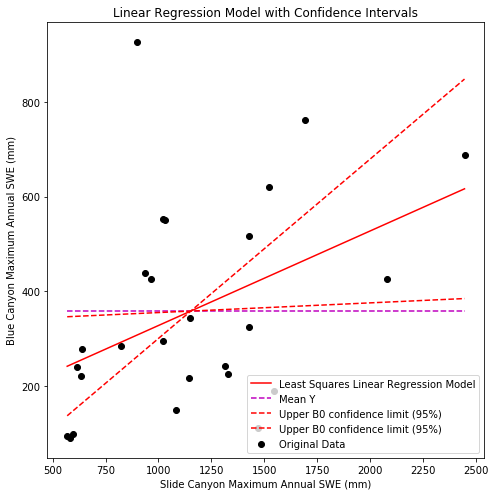

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)

# Scatterplot of original data
ax.scatter(x, y, c='k', label='Original Data')

# Plot the regression line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [B0 + B1*x.min(), B0 + B1*x.max()] , '-r', label='Least Squares Linear Regression Model')

# Plot the mean line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [y.mean(), y.mean()] , '--m', label='Mean Y')

# Plot the upper and lower confidence limits for the standard error of the gradient (slope)
ax.plot([x.min(), x.max()], [B0_upper + B1_upper*x.min(), B0_upper + B1_upper*x.max()] , '--r', label='Upper B0 confidence limit (95%)')
ax.plot([x.min(), x.max()], [B0_lower + B1_lower*x.min(), B0_lower + B1_lower*x.max()] , '--r', label='Upper B0 confidence limit (95%)')


# Add legend
plt.legend(loc='lower right');

# Add axes labels and title
ax.set_xlabel('Slide Canyon Maximum Annual SWE (mm)')
ax.set_ylabel('Blue Canyon Maximum Annual SWE (mm)')
ax.set_title('Linear Regression Model with Confidence Intervals');

## Confidence Interval for Predicted Values of y

**Compute confidence limits for the predicted values of y**

To compute confidence limits on our predicted values of y, we need to predict some values of y first!

For the prediction intervals, I'm naming the variables `p_x` and `p_y`, in the equations below these correspond to $x^*$ and $\hat{y}^*$.

In [16]:
# an array of x values
p_x = np.linspace(x.min(),x.max(),100)

# using our model parameters to predict y values
p_y = B0 + B1*p_x

For some value $x^*$ we want to predict a corresponding $y^*$ using our model.

$\hat{y}^* = \hat{B}_0 + \hat{B}_1x^*$

But what is the undercertainty of the $\hat{y}^*$ we'll calculate? We can compute a prediction interval for a given confidence (such a 95%).

The error of our prediction is the difference between the "true" value of $y^*$ for $x^*$, and our predicted $\hat{y}^*$:

$B_0 + B_1x^* - \hat{B}_0 + \hat{B}_1x^*$

The variance of this prediction error ($\sigma_{E_P}^2$) will help define our prediction intervals, and can be computed as follows:

$\sigma_{E_p}^2(x^*) = s^2 \Bigg[ 1 + \displaystyle\frac{1}{n} + \displaystyle\frac{n(x^*-\bar{x})^2}{n \sum{x_i^2} + (\sum{x_i})^2} \Bigg]$

or

$\sigma_{E_p}^2(x^*) = s^2 \Bigg[ 1 + \displaystyle\frac{1}{n} + \displaystyle\frac{(x^*-\bar{x})^2}{SST_x} \Bigg]$

Now compute our error of prediction ($\sigma_{E_p}$) for each p_x:

In [17]:
sigma_ep = np.sqrt( s**2 * (1+ 1/n + ( ( n*(p_x-x.mean())**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) ) )

The lower and upper confidence limits based on predicted y and confidence intervals (which follow a t-distribution) can be computed as:

$y^* \pm t_{\frac{\alpha}{2},n-2} \cdot \sigma_{E_p}(x^*)$

In [18]:
alpha = 0.05

n = len(p_x)
dof = n - 2

t = stats.t.ppf(1-alpha/2, dof)

p_y_lower = p_y - t * np.sqrt(sigma_ep)
p_y_upper = p_y + t * np.sqrt(sigma_ep)

**Finally, plot the upper and lower confidence limits for the predicted y values**

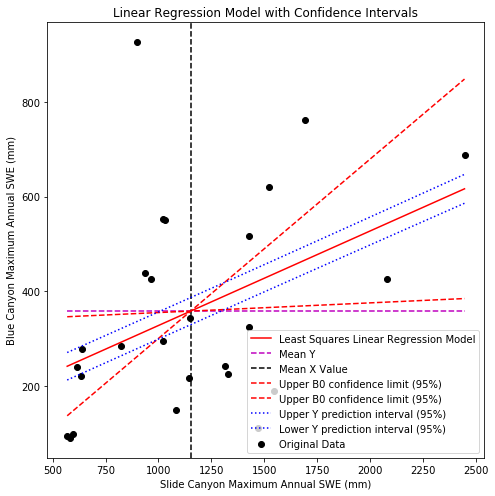

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)

# Scatterplot of original data
ax.scatter(x, y, c='k', label='Original Data')

# Plot the regression line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [B0 + B1*x.min(), B0 + B1*x.max()] , '-r', label='Least Squares Linear Regression Model')

# Plot the mean line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [y.mean(), y.mean()] , '--m', label='Mean Y')

# Plot the mean x line
plt.axvline(x.mean(),c='k', linestyle='--', label='Mean X Value')

# Plot the upper and lower confidence limits for the standard error of the gradient (slope)
ax.plot([x.min(), x.max()], [B0_upper + B1_upper*x.min(), B0_upper + B1_upper*x.max()] , '--r', label='Upper B0 confidence limit (95%)')
ax.plot([x.min(), x.max()], [B0_lower + B1_lower*x.min(), B0_lower + B1_lower*x.max()] , '--r', label='Upper B0 confidence limit (95%)')

# Plot confidence limits on our predicted Y values
ax.plot(p_x, p_y_upper, ':b', label='Upper Y prediction interval (95%)')
ax.plot(p_x, p_y_lower, ':b', label='Lower Y prediction interval (95%)')

# Add legend
plt.legend(loc='lower right');

# Add axes labels and title
ax.set_xlabel('Slide Canyon Maximum Annual SWE (mm)')
ax.set_ylabel('Blue Canyon Maximum Annual SWE (mm)')
ax.set_title('Linear Regression Model with Confidence Intervals');

Our upper and lower predicted y confidence limits look almost parallel, but are they? 

To inspect this, we can plot the difference between the two versus x to see how our 95% interval changes shape as we move along the x axis, and see that they "pivot" around the mean x value of the original dataset.

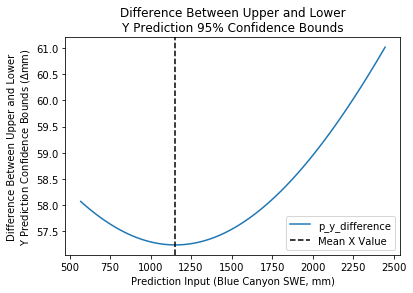

In [20]:
p_y_difference = p_y_upper - p_y_lower
plt.plot(p_x, p_y_difference, label='p_y_difference')
plt.axvline(x.mean(),c='k', linestyle='--', label='Mean X Value')

plt.legend()
plt.xlabel('Prediction Input (Blue Canyon SWE, mm)')
plt.ylabel('Difference Between Upper and Lower\nY Prediction Confidence Bounds ($\Delta$mm)')
plt.title('Difference Between Upper and Lower\nY Prediction 95% Confidence Bounds');

As we'd expect, they're not quite parallel (they vary along the x-axis) and are narrowest at $\bar{x}$ where we have higher confidence in our ability to make predictions with the model.

---

## With scipy

**How do we do this quickly in python?**

As always, there are a few options, two of the easier ones that are in packages we already have here are:
- `scipy.stats.linregress()` we've used this previously
- `numpy.polyfit()` we can fit a 1st order polynomial (linear function)

I'm going to use the scipy function below (remember, this outputs our standard error of the gradient for us already):

In [21]:
B1, B0, r, p, sB1 = stats.linregress(x, y)

Compute the upper and lower limits for the B1 parameter

In [22]:
# our alpha for 95% confidence
alpha = 0.05

# length of the original dataset
n = len(x)
# degrees of freedom
dof = n - 2

# t-value for alpha/2 with n-2 degrees of freedom
t = stats.t.ppf(1-alpha/2, dof)

# compute the upper and lower limits on our B1 (slope) parameter
B1_upper = B1 + t * sB1
B1_lower = B1 - t * sB1

# compute the corresponding upper and lower B0 values (y intercepts)
B0_upper = y.mean() - B1_upper*x.mean()
B0_lower = y.mean() - B1_lower*x.mean()

Create some predictions values, compute our error of prediction (sigma_ep) for each p_x, then the lower and upper confidence limits (for 95%) can be computed as:

In [23]:
# an array of x values
p_x = np.linspace(x.min(),x.max(),100)

# using our model parameters to predict y values
p_y = B0 + B1*p_x

# calculate the standard error of the predictions
sigma_ep = np.sqrt( s**2 * (1 + 1/n + ( ( n*(p_x-x.mean())**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) ) )

# our chosen alpha
alpha = 0.05

# compute our degrees of freedom with the length of the predicted dataset
n = len(p_x)
dof = n - 2

# get the t-value for our alpha and degrees of freedom
t = stats.t.ppf(1-alpha/2, dof)

# compute the upper and lower limits at each of the p_x values
p_y_lower = p_y - t * np.sqrt(sigma_ep)
p_y_upper = p_y + t * np.sqrt(sigma_ep)

**Plot it all again**

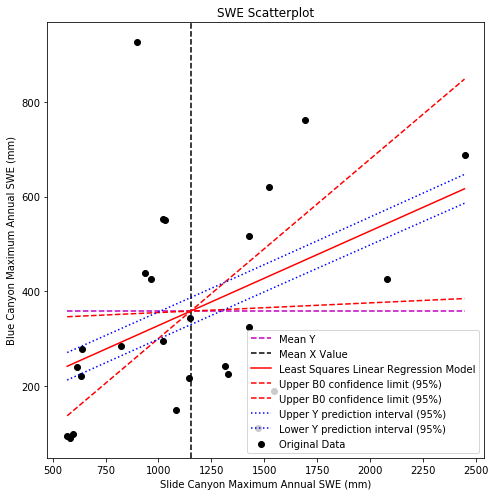

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7), tight_layout=True)

# Scatterplot of original data
ax.scatter(x, y, c='k', label='Original Data')

# Plot the mean line, we only need two points to define a line, use xmin and xmax
ax.plot([x.min(), x.max()], [y.mean(), y.mean()] , '--m', label='Mean Y')

# Plot the mean x line
plt.axvline(x.mean(),c='k', linestyle='--', label='Mean X Value')

# Plot the linear regression model
ax.plot([x.min(), x.max()], [B0 + B1*x.min(), B0 + B1*x.max()], '-r', label='Least Squares Linear Regression Model')

# Plot the upper and lower confidence limits for the standard error of the gradient (slope)
ax.plot([x.min(), x.max()], [B0_upper + B1_upper*x.min(), B0_upper + B1_upper*x.max()] , '--r', label='Upper B0 confidence limit (95%)')
ax.plot([x.min(), x.max()], [B0_lower + B1_lower*x.min(), B0_lower + B1_lower*x.max()] , '--r', label='Upper B0 confidence limit (95%)')

# Plot confidence limits on our predicted Y values
ax.plot(p_x, p_y_upper, ':b', label='Upper Y prediction interval (95%)')
ax.plot(p_x, p_y_lower, ':b', label='Lower Y prediction interval (95%)')

# Add legend
plt.legend(loc='lower right');

# Add axes labels and title
ax.set_xlabel('Slide Canyon Maximum Annual SWE (mm)')
ax.set_ylabel('Blue Canyon Maximum Annual SWE (mm)')
ax.set_title('SWE Scatterplot');